<a href="https://colab.research.google.com/github/LucasColas/ML01-Machine-Learning-for-everyone/blob/main/ML01_TD9_Decision_Tree_and_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML01 : TD9 - Arbres de décisions et Random Forrest

Réalisé par Cyprien Gilet et Khaled Belahcene

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Arbre de décision par Scikit-Learn sur base de données Diabete_UCI

Dans cette section nous souhaitons prendre en main la calibration d'arbres de décision proposés par Scikit-Learn sur la base de données Diabete_UCI. Concernant cette base de données, l'objectif est de diagnostiquer la variable d'intérêt diabète. 
Le code ci-dessous permet d'importer la base de données Diabete_UCI.

In [ ]:
df = pd.read_csv('Datasets/diabetes_UCI.csv')
print(df.columns.values)
print('df =', df)
print('df_Info =', df.info())

df = df.reset_index()
df.drop(['index'], axis='columns', inplace=True)

YRdf = pd.DataFrame(df['Outcome'])
YR = np.array(YRdf).ravel()
print('np.unique(YR) =', np.unique(YR))

Xdf = df.copy()
Xdf.drop(['Outcome'], axis='columns', inplace=True)

K = int(np.max(YR))
X = np.array(Xdf)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
df =      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        

In [ ]:
X.shape

(768, 8)

**Question 1.1.** Diviser aléatoirement la base de données en une base d'apprentissage et une base de test : 

- La base d'apprentissage contiendra $n=500$ observations (patients).
- La base de test contiendra les observations (patients) restants (soit 268).

In [ ]:
# RÉPONSE À LA QUESTION 1.1:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, YR, test_size=268/X.shape[0])


In [ ]:
X_test.shape

(268, 8)

**Question 1.2.** À partir de la base d'apprentissage calibrer un arbre de décision en appliquant la fonction proposée par Scikit-Learn. Pour cette question, nous ne donnerons pas de spécifications concernant la profondeur de l'arbre.

- Quelle est le nombre total de feuilles terminales dans l'arbre de décision ?
- Quelle est l'accuracy globale sur la base d'apprentissage ?
- Quelle est l'accuracy globale sur la base de test ?


In [ ]:
# RÉPONSE À LA QUESTION 1.2:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
clf.get_depth()

12

In [ ]:
clf.get_n_leaves()

94

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.7350746268656716

[Text(151.39237500000002, 209.07692307692307, 'X[1] <= 123.5\ngini = 0.45\nsamples = 500\nvalue = [329, 171]'),
 Text(68.2155, 192.35076923076923, 'X[7] <= 28.5\ngini = 0.279\nsamples = 280\nvalue = [233, 47]'),
 Text(29.713500000000003, 175.62461538461537, 'X[5] <= 45.4\ngini = 0.137\nsamples = 162\nvalue = [150, 12]'),
 Text(26.3655, 158.89846153846153, 'X[5] <= 33.25\ngini = 0.107\nsamples = 159\nvalue = [150, 9]'),
 Text(6.696000000000001, 142.1723076923077, 'X[3] <= 31.5\ngini = 0.019\nsamples = 107\nvalue = [106, 1]'),
 Text(3.3480000000000003, 125.44615384615385, 'gini = 0.0\nsamples = 102\nvalue = [102, 0]'),
 Text(10.044, 125.44615384615385, 'X[4] <= 77.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(6.696000000000001, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(13.392000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(46.035000000000004, 142.1723076923077, 'X[6] <= 0.664\ngini = 0.26\nsamples = 52\nvalue = [44, 8]'),
 Text(28.45800000000

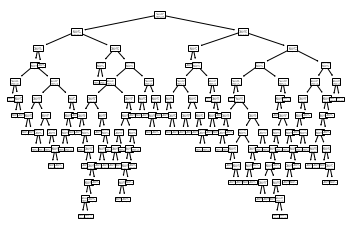

In [ ]:
tree.plot_tree(clf)

**Question 1.3.** À partir de la base d'apprentissage calibrer un arbre de décision en appliquant la fonction proposée par Scikit-Learn. Pour cette question, nous souhaitons obtenir 10 observations minimum par feuille terminale.

- Quelle est le nombre total de feuilles terminales dans l'arbre de décision ?
- Quelle est l'accuracy globale sur la base d'apprentissage ?
- Quelle est l'accuracy globale sur la base de test ?

Refaire la même procédure avec 40 puis 100 observations minimum par feuille terminale. Que peut-on constater ?


In [ ]:
# RÉPONSE À LA QUESTION 1.3:
from sklearn import tree

#10 observations minimum par feuille terminale
clf = tree.DecisionTreeClassifier(min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [ ]:
clf.get_depth()

7

In [ ]:
clf.score(X_train, y_train)

0.834

In [ ]:
clf.score(X_test, y_test)

0.7947761194029851

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_leaf=40)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=40)

In [ ]:
clf.get_depth()

4

In [ ]:
clf.score(X_train, y_train)

0.788

In [ ]:
clf.score(X_test, y_test)

0.746268656716418

In [ ]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

In [ ]:
clf.get_depth()

2

In [ ]:
clf.score(X_train, y_train)

0.746

In [ ]:
clf.score(X_test, y_test)

0.7388059701492538

**Question 1.4.** À partir de la base d'apprentissage calibrer un arbre de décision en appliquant la fonction proposée par Scikit-Learn. Pour cette question, nous souhaitons obentenir maximum 30 feuilles terminales dans l'arbre complet.

- Quelle est l'accuracy globale sur la base d'apprentissage ?
- Quelle est l'accuracy globale sur la base de test ?

Refaire la même procédure avec 10 puis 5 feuilles terminales dans l'arbre complet. Que peut-on constater ?


In [ ]:
# RÉPONSE À LA QUESTION 1.4:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_leaf_nodes=30)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=30)

In [ ]:
clf.score(X_train, y_train)

0.9

In [ ]:
clf.score(X_test, y_test)

0.7798507462686567

In [ ]:
# RÉPONSE À LA QUESTION 1.4:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_leaf_nodes=10)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=30)

In [ ]:
clf.score(X_train, y_train)

0.896

In [ ]:
clf.score(X_test, y_test)

0.7723880597014925

In [ ]:
# RÉPONSE À LA QUESTION 1.4:
from sklearn import tree


clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=5)

In [ ]:
clf.score(X_train, y_train)

0.774

In [ ]:
clf.score(X_test, y_test)

0.746268656716418

**Question 1.5.** Dans cette question nous souhaitons élaguer l'arbre de sorte qu'il se généralise bien sur la base de validation. Pour cela nous souhaitons nous référer au Coût-Complexité. En regardant les tutoriels proposés par Scikit-Learn, proposer un code permettant de réaliser cet objectif.


In [ ]:
# RÉPONSE À LA QUESTION 1.5:
from sklearn import tree


#10 observations minimum par feuille terminale
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

[Text(149.85992647058825, 209.6742857142857, 'X[1] <= 123.5\ngini = 0.45\nsamples = 500\nvalue = [329, 171]'),
 Text(66.8779411764706, 194.14285714285714, 'X[7] <= 28.5\ngini = 0.279\nsamples = 280\nvalue = [233, 47]'),
 Text(29.13088235294118, 178.61142857142858, 'X[5] <= 45.4\ngini = 0.137\nsamples = 162\nvalue = [150, 12]'),
 Text(25.84852941176471, 163.07999999999998, 'X[5] <= 33.25\ngini = 0.107\nsamples = 159\nvalue = [150, 9]'),
 Text(6.564705882352942, 147.54857142857142, 'X[3] <= 31.5\ngini = 0.019\nsamples = 107\nvalue = [106, 1]'),
 Text(3.282352941176471, 132.01714285714286, 'gini = 0.0\nsamples = 102\nvalue = [102, 0]'),
 Text(9.847058823529412, 132.01714285714286, 'X[4] <= 77.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(6.564705882352942, 116.48571428571428, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(13.129411764705884, 116.48571428571428, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(45.13235294117648, 147.54857142857142, 'X[6] <= 0.664\ngini = 0.26\ns

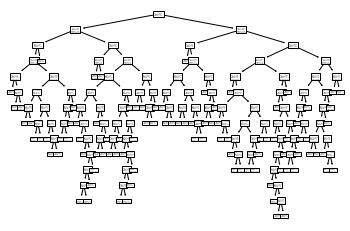

In [ ]:
tree.plot_tree(clf)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

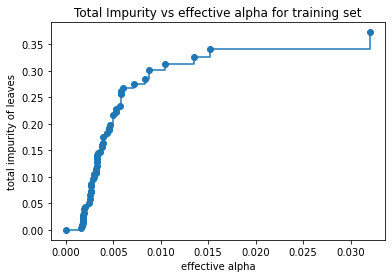

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07719277922077927


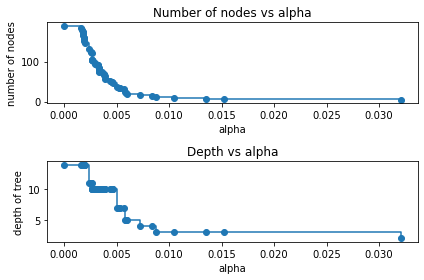

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

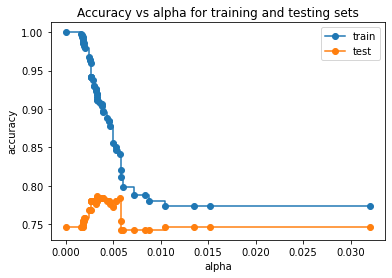

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

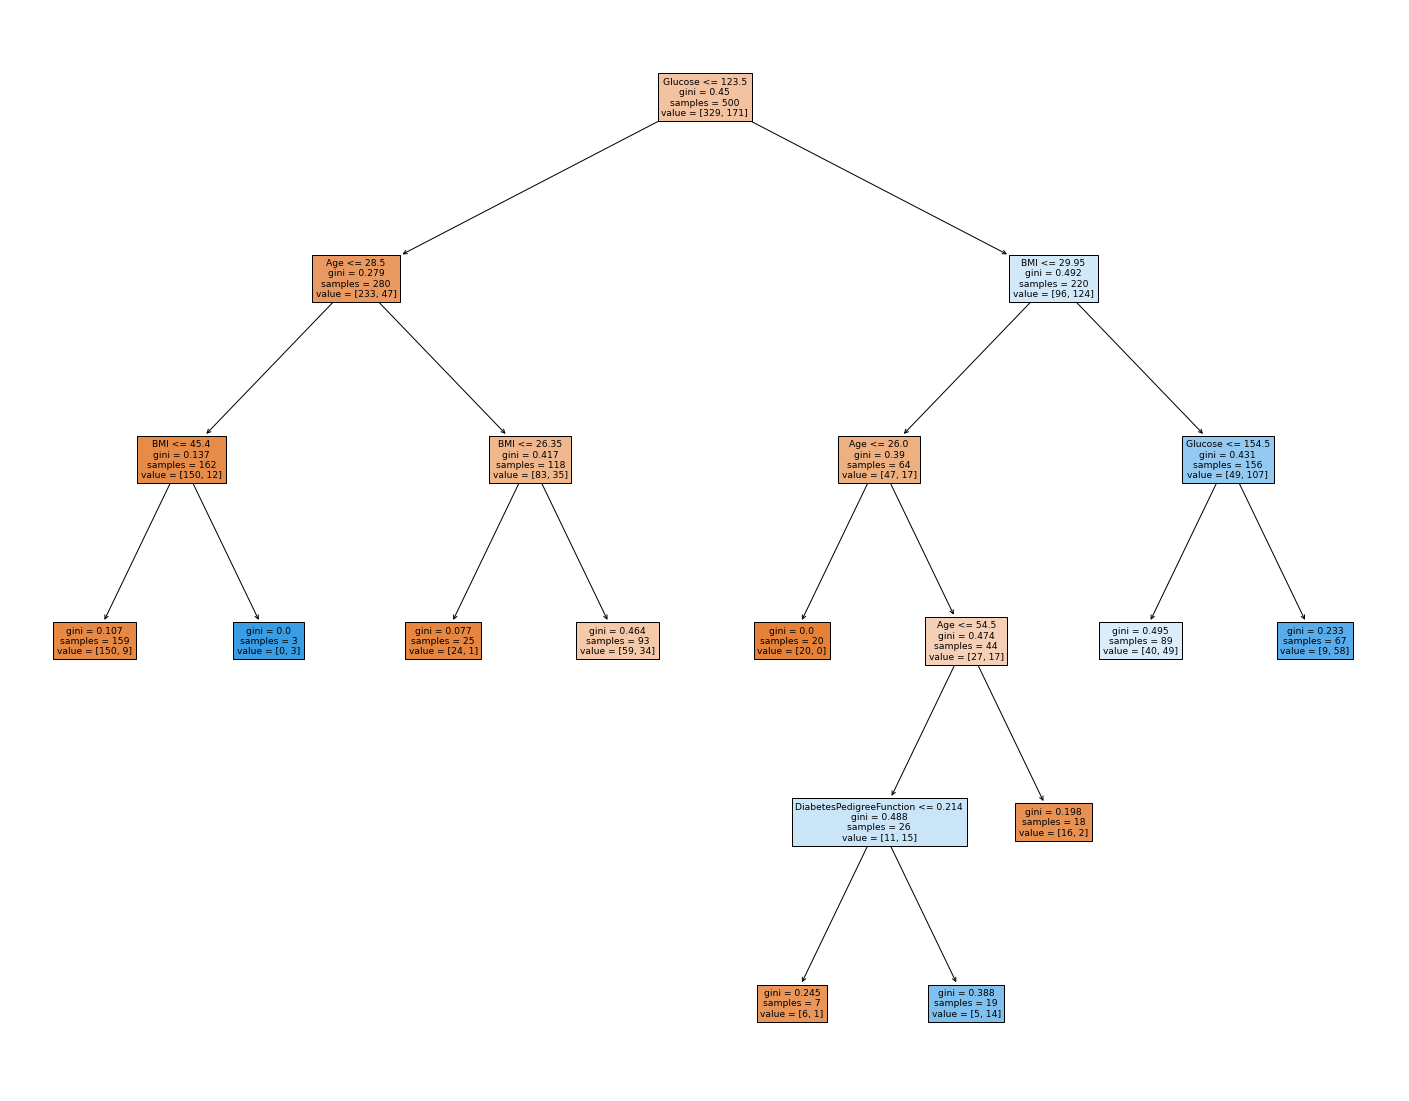

In [ ]:
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(ccp_alpha=0.006)
clf.fit(X_train,y_train)
_ = tree.plot_tree(clf, feature_names=Xdf.columns, filled=True)

# 2. Validation Croisée : Random Forest versus Régression Logistique, Naive Bayes, QDA, LDA

Dans cette section nous souhaitons comparer les classifieurs Random Forest, Régression Logistique, Naive Bayes, QDA, LDA, la base de données Diabete_UCI à partir d'une validation croisée de 10 folds.

**Question 2.1.** Implémenter le code permettant de qualibrer tous ces classifieurs dans une validation croisée et comparer les risques d'erreurs globaux de chaque classifieur. Lequel est en moyenne le plus performant sur les bases de validations ?

In [ ]:
# RÉPONSE À LA QUESTION 2.1 :

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
import pandas as pd

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
models = [('LogReg', LogisticRegression(max_iter=300)), ('RF', RandomForestClassifier()), ('GNB', GaussianNB()), 
          ('QDA', QuadraticDiscriminantAnalysis()), ('LDA', LinearDiscriminantAnalysis())]

results = []
names = []
folds = 10
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
dfs = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=folds, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    #y_pred = clf.predict(X_test)
    print(name)
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    
    this_df['loss test'] = 1 - cv_results['test_accuracy']
    this_df['model'] = name
    dfs.append(this_df)
    
final = pd.concat(dfs, ignore_index=True)

LogReg
{'fit_time': array([0.03789377, 0.02593088, 0.02293897, 0.0259304 , 0.03091764,
       0.01595783, 0.02293921, 0.02393532, 0.02792525, 0.02593064]), 'score_time': array([0.00299191, 0.00199437, 0.00299144, 0.00398898, 0.0029912 ,
       0.00299191, 0.00299215, 0.00299191, 0.00199509, 0.00299191]), 'test_accuracy': array([0.76, 0.82, 0.66, 0.68, 0.7 , 0.82, 0.68, 0.84, 0.8 , 0.84]), 'test_precision_weighted': array([0.76149688, 0.84526316, 0.65529412, 0.68      , 0.765     ,
       0.81485095, 0.72842105, 0.84990476, 0.8       , 0.84411765]), 'test_recall_weighted': array([0.76, 0.82, 0.66, 0.68, 0.7 , 0.82, 0.68, 0.84, 0.8 , 0.84]), 'test_f1_weighted': array([0.74808824, 0.82943942, 0.6573858 , 0.68      , 0.67001357,
       0.80627894, 0.65666667, 0.84349206, 0.8       , 0.83611111]), 'test_roc_auc': array([0.84040747, 0.85094851, 0.69340463, 0.76388889, 0.78099839,
       0.91865079, 0.79807692, 0.91268191, 0.8531746 , 0.90833333])}
RF
{'fit_time': array([0.12267184, 0.1256980

In [ ]:
final.describe()

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,loss test
count,50.000000,50.000000,50.0000,50.000000,50.0000,50.000000,50.000000,50.0000
mean,0.030262,0.006022,0.7524,0.763347,0.7524,0.747440,0.822606,0.2476
std,0.047846,0.006348,0.0682,0.067422,0.0682,0.071222,0.070189,0.0682
min,0.000000,0.001994,0.6400,0.630095,0.6400,0.618125,0.691622,0.1400
25%,0.000997,0.002991,0.7000,0.725714,0.7000,0.681879,0.775929,0.1800
50%,0.000999,0.002992,0.7500,0.767151,0.7500,0.750584,0.838732,0.2500
75%,0.027427,0.002995,0.8200,0.821998,0.8200,0.806279,0.885135,0.3000
max,0.131647,0.020944,0.8600,0.864048,0.8600,0.861634,0.925156,0.3600


In [ ]:
mean_loss = final.groupby(['model']).mean()
final

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,loss test,model
0,0.037894,0.002992,0.76,0.761497,0.76,0.748088,0.840407,0.24,LogReg
1,0.025931,0.001994,0.82,0.845263,0.82,0.829439,0.850949,0.18,LogReg
2,0.022939,0.002991,0.66,0.655294,0.66,0.657386,0.693405,0.34,LogReg
3,0.025930,0.003989,0.68,0.680000,0.68,0.680000,0.763889,0.32,LogReg
4,0.030918,0.002991,0.70,0.765000,0.70,0.670014,0.780998,0.30,LogReg
5,0.015958,0.002992,0.82,0.814851,0.82,0.806279,0.918651,0.18,LogReg
6,0.022939,0.002992,0.68,0.728421,0.68,0.656667,0.798077,0.32,LogReg
7,0.023935,0.002992,0.84,0.849905,0.84,0.843492,0.912682,0.16,LogReg
8,0.027925,0.001995,0.80,0.800000,0.80,0.800000,0.853175,0.20,LogReg
9,0.025931,0.002992,0.84,0.844118,0.84,0.836111,0.908333,0.16,LogReg


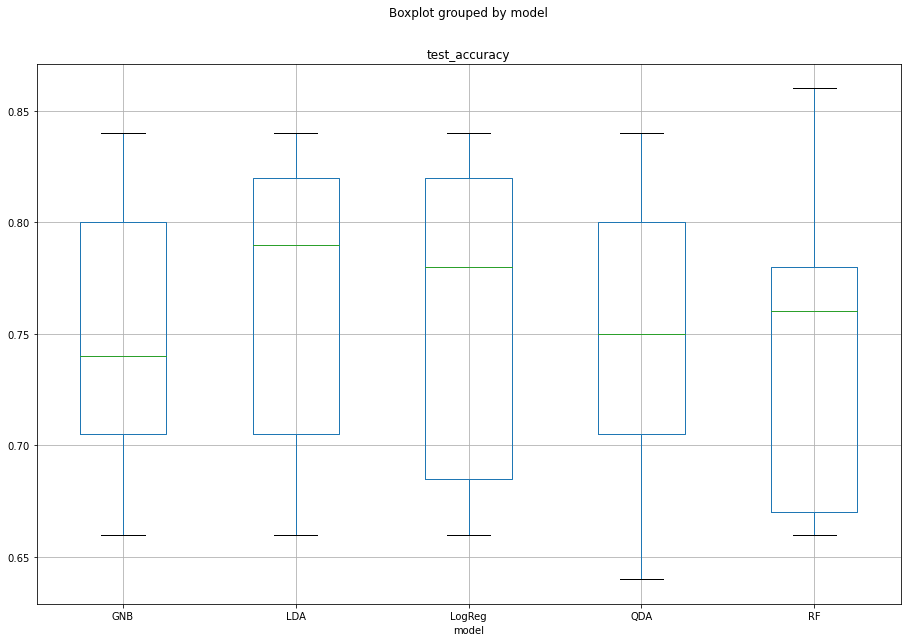

In [ ]:
b_plot = final.boxplot(column='test_accuracy', by='model', figsize=(15,10))

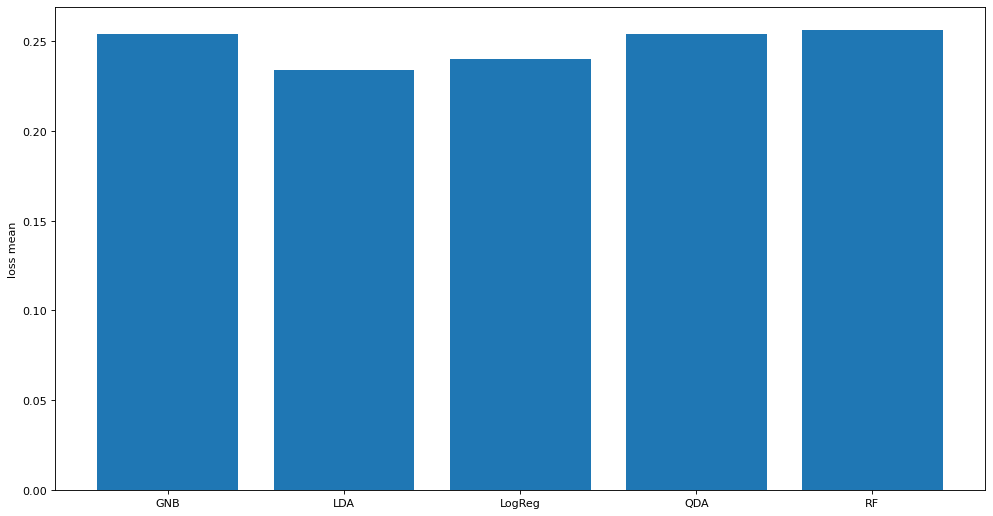

In [ ]:
plt.figure(figsize=(15, 8), dpi=80)
plt.bar(np.array(['GNB', 'LDA', 'LogReg', 'QDA', 'RF']), mean_loss['loss test'].to_numpy())
plt.ylabel("loss mean")
plt.show()